# Heliocloud and SunPy Tutorial

In [1]:
#Import some packages to get started

import os
import io
import csv
import glob

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sunpy.map

/home/jovyan/users_conda_envs/pythonenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## SDO data in HelioCloud

For this project we will be using data from the Solar Dynamics Observatory (SDO) which has been collecting solar data from 2010 up to the present. SDO has three instruments onboard: HMI (Helioseismic and Magnetic Imager), AIA (Atmospheric Imaging Assembly), and EVE (Extreme Ultraviolet Variability Experiment). 

HelioCloud has some data from AIA and HMI in the S3 bucket 'gov-nasa-hdrl-data1'. We will mainly be working with HMI data, but I'll give a quick description of the all data available and example object keys for the different data series. *(What's an Object Key? It's a unique identifier for an object stored in an Amazon S3 bucket. It's what you use to call the data and it looks very similar to a UNIX file path.)*
<hr> 

**The Helioseismic and Magnetic Imager**

The HMI instrument was designed to study oscillations and the magnetic field at the solar surface. HMI is an imaging spectro-polarimeter that collects narrow-band polarized filtergrams at six wavelengths across the 6173 Angstrom Fe I absorption line. The HelioCloud HMI dataset includes the line-of-sight velocity corrected
for Sun-spacecraft motion; the line-of-sight magnetic field; computed continuum intensity (both as observed
and corrected for limb darkening); and the three components of the vector magnetic field and
the uncertainty in each component.

The HMI instrument is oriented upside down on SDO, so normally the data is upside down. In HelioCloud the data has already been centered and rotated so it is the right way up.

*Data from 20100501-20221231 are available*

| Data | Example Object Key|
| ---- | -------------- |
| HMI 720s Line-of-sight <br> Magnetic field (M) at <br> 2022:10:02_00:00:00 TAI | sdo/hmi/20221002/M/sdo_hmi_h2_20221002T000000_M_v1.fits |
| HMI 720s Continuum Intensity (Ic) | sdo/hmi/20221002/Ic/sdo_hmi_h2_20221002T000000_Ic_v1.fits |
| HMI 720s Continuum Intensity <br> corrected for limb darkening | sdo/hmi/20221002/Ic_noLimbDark/sdo_hmi_h2_20221002T002400_Ic_noLimbDark_v1.fits |
| HMI 720s Velocity | sdo/hmi/20221002/V/sdo_hmi_h2_20221002T000000_V_v1.fits |
| HMI Radial magnetic <br> field component | sdo/hmi/20221002/B/sdo_hmi_h2_20221002T003600_Br_v1.fits |
| HMI Radial field uncertainty | sdo/hmi/20221002/B/sdo_hmi_h2_20221002T003600_Br_err_v1.fits |
| HMI Westward magnetic <br> field component | sdo/hmi/20221002/B/sdo_hmi_h2_20221002T000000_Bp_v1.fits |
| HMI Westward field uncertainty | sdo/hmi/20221002/B/sdo_hmi_h2_20221002T000000_Bp_err_v1.fits |
| HMI Southward magnetic <br> field component | sdo/hmi/20221002/B/sdo_hmi_h2_20221002T001200_Bt_v1.fits |
| HMI Southward field uncertainty | sdo/hmi/20221002/B/sdo_hmi_h2_20221002T001200_Bt_err_v1.fits |

*Note the vector B magnetic field keywords have a capitalization error for data in 2010 through 2012. This includes Br, Bt, Bp, Br_err, Bt_err, and Bp_err. The keywords have the series name lowercased like this:
> sdo/hmi/20221002/B/sdo_hmi_h2_20120101T234800_**b**p_err_v1.fits
> sdo/hmi/20221002/B/sdo_hmi_h2_20221002T000000_**b**p_v1.fits 


<hr>

**Ancillary Files**

These are single 3D FITS files that includes four ancillary data values for each of the 4096x4096 image
pixels (calculated every 4 minutes from HMI data). Note the AIA data in HelioCloud is scaled to 0.5000 arc seconds per pixel which is the same as HMI, so the ancillary files should also work for the AIA images in HelioCloud.

*Data from 20100501-20141231 and 20200101-20221231 are available*

| Data | Example Object Key|
| ---- | -------------- |
|Ancillary latitude,<br>longitude, and line-of-sight<br> SDO velocity|sdo/ancillary/20220101/LatLonVMu/sdo_ancillary_h2_20220101T012400_LatLonVMu_v1.fits|

3D FITS file order:
- Heliographic longitude [\*,\*,0]
- Heliographic latitude [\*,\*,1]
- Line-of-sight component of the satellite velocity at each pixel, accounting for both Earth and SDO motions [\*,\*,2]
- Center-to-limb angle, mu [\*,\*,3]

<hr>

**The Atmospheric Imaging Assembly**

The AIA instrument was designed to study the solar corona and captures full images of the Sun and lower atmosphere in multiple different wavelengths. The HelioCloud AIA dataset consists of 2 UV (1600, 1700) and 7 EUV channels (94, 131, 171, 193, 211, 304, and 335 A) obtained at 4-minute intervals.

*Data from 20100513-20221231 are available*

| Data | Example Object Key|
| ---- | ----------------- |
| AIA 94A EUV Image at time <br> 2022.06.01_00:00:00 TAI | sdo/aia/20220601/0094/sdo_aia_h2_20220601T000000_94_v1.fits
| AIA 131A EUV Image |sdo/aia/20221002/0131/sdo_aia_h2_20221002T000400_131_v1.fits |
| AIA 171A EUV Image | sdo/aia/20220601/0171/sdo_aia_h2_20220601T055600_171_v1.fits |
| AIA 193A EUV Image | sdo/aia/20220601/0193/sdo_aia_h2_20220601T000000_193_v1.fits |
| AIA 211A EUV Image | sdo/aia/20220601/0211/sdo_aia_h2_20220601T000000_211_v1.fits |
| AIA 304A EUV Image | sdo/aia/20220601/0304/sdo_aia_h2_20220601T000000_304_v1.fits |
| AIA 335A EUV Image | sdo/aia/20220601/0335/sdo_aia_h2_20220601T000000_335_v1.fits |
| AIA 1600A UV Image | sdo/aia/20220601/1600/sdo_aia_h2_20220601T000000_1600_v1.fits |
| AIA 1700A UV Image | sdo/aia/20220601/1700/sdo_aia_h2_20220601T000000_1700_v1.fits | 

<hr>

**Registry Files**

There are registry files in HelioCloud that *should* list all of the data (and their keywords) stored in HelioCloud. Here are their object keys:

Ancillary: sdo/ancillary/registry/LatLonVMu_2012.csv <br>
AIA: sdo/aia/registries/aia_0094_2016.csv <br>
HMI: sdo/hmi/registries/hmi_B_2018.csv <br>

*There are separate registry files for each AIA and HMI data series and year. They have the same format just swap the series name and year for the one you want. For example if you want the AIA 171 data registry for 2011 the data key is* sdo/aia/registries/aia_0171_2011.csv  

<hr> 
<hr> 

**A Quick Note on S3 and Object Keys**

Amazon S3 buckets have a flat structure, meaning that an object created in a folder folder1/object1.txt would have the key folder1/object1.txt. However, since humans enjoy the concept of folders and directories, Amazon S3 provides something called a Common Prefix, which is similar to the concept of a path.

When listing the contents of a bucket, paths (effectively keys without the final "object name") are provided which are a list of CommonPrefixes. This allows users to step through folder hierarchies. However, the Key of all objects include their full path.

If you want to check it out for yourself, you can open up a terminal from the launcher and use this command to query the 'gov-nasa-hdrl-data1' bucket. You need '--no-sign-request' at the end to access the bucket. 

<br> `aws s3 ls s3://gov-nasa-hdrl-data1/ --no-sign-request`
>                           PRE cdaweb/
>                           PRE contrib/
>                           PRE sdac/
>                           PRE sdo/
>                           PRE spdf/ . . .

(The "PRE" stands for prefix, and indicates sdo/ is an AWS prefix. ) 


In [2]:
#Bt-B theta

## FITS files and S3

Now that we've introduced the data, lets try opening one of the HMI 720s Continuum Intensity images. First we need to establish a connection to the bucket 'gov-nasa-hdrl-data1' where all the SDO data is stored. This bucket is public, however it does want an AWS credential. You can circumvent this by adding the ‘—no-sign-request’ parameter to the aws client or by the equivalent boto3 library call  below:

In [3]:
import boto3
from botocore import UNSIGNED
from botocore.config import Config

mybucket='gov-nasa-hdrl-data1'
s3c = boto3.client('s3', config=Config(signature_version=UNSIGNED))

#You only have to connect to S3 once. Not everytime you open a new fits file.

All SDO data are FITS (flexible image transport system) files, which are the most commonly used digital file format in astronomy and heliophysics. They can normally can be opened with either SunPy or AstroPy. However, SunPy currently is not capable of opening files in S3, so we need to open the files initially with AstroPy.

First we specify which object we want using it's key and which bucket it is located in:

In [4]:
fobj = s3c.get_object(Bucket=mybucket,Key= 'sdo/hmi/20220423/Ic/sdo_hmi_h2_20220423T070000_Ic_v1.fits')

We then open it with AstroPy:

In [5]:
import astropy.io.fits
from astropy.io import fits
from astropy.io.fits import CompImageHDU

rawdata = fobj['Body'].read()
bdata = io.BytesIO(rawdata) 
hdul = astropy.io.fits.open(bdata,memmap=False)

#When you are done you can use hdul.close() to close the file

 AstroPy's .open() function returns a HDUL (header data unit list) which as the name suggests is a list-like collection of HDU objects in a FITS file. Header data units (HDU) are the fundamental container structure of the FITS format that consists of metadata (called the header) and usually a data array.

You can use .info() to summarize the contents of an opened fits file:

In [6]:
hdul.info()

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    111   (4096, 4096)   int16   


The list shows that our FITS file has two HDU objects named 'PRIMARY' and 'COMPRESSED_IMAGE'. The PRIMARY HDU is empty and can be ignored (you can tell from the list because the dimensions and format are blank). 

The HMI data and header we want are in the COMPRESSED_IMAGE HDU. You can see the data has dimensions 4096 x 4096 which is the size of HMI solar images.

The data and header for this HDU can be accessed like this:

In [7]:
data = hdul[1].data 
header = hdul[1].header

#You can also use hdul['COMPRESSED_IMAGE'] instead of hdul[1]

We will start by looking at the header. For those unfamiliar with FITS headers, they consist of a list of 80 byte “cards”, where a card contains a keyword, a value, and a comment. Keywords are usually unique within a header, except in a few special cases.

The header contains information about the data and the instrument (i.e observation time, satelite velocity, maximum value...). Take a look:

In [8]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 4096 / length of original image axis                  
NAXIS2  =                 4096 / length of original image axis                  
DATE    = '2022-12-17T10:35:09.000' / [ISO] HDU creation date                   
TELESCOP= 'SDO/HMI '           / Mission and Instrument                         
INSTRUME= 'HMI_COMBINED'       / For HMI: HMI_SIDE1, HMI_FRONT2, or HMI_COMBINED
WAVELNTH=                6173. / [angstrom] Wavelength                          
CAMERA  =                    3 / ID of the camera(s) for this file.             
FILENAME= 'sdo_hmi_h2_20220423T070000_Ic_v1.fits' / File name used for this file
BUNIT   = 'DN/s    '           / Physical Units                                 
ORIGIN  = 'SDO/JSOC-SDP'    

If you are interested in a specific key word you can call them like so:

In [9]:
header['QUALITY']

0

The keyword 'QUALITY' lets you know if any quality flags were raised. In this image no quality flags were raised so the value is zero. If a quality flag was raised the value will be nonzero and indicates there could be an issue with the data.

The other part of the HDU is the data, which in this case is a 2D (NumPy) array sized 4096x4096. The HMI Ic data is a map of the continuum intensity of the solar spectrum and looks at the photosphere. In the header you'll see the units are DN/s (data number per second). HMI (and AIA) produce images by using a telescope to direct filtered light from the sun onto a CCD, which is a grid of individual light sensors that each corresponds to one pixel. Data number per second in this case is essentially how many photons are counted by each individual pixel in a second. The more photons a pixel detects, the brighter the area on the sun that pixel corresponds to.

To access an individual element of the array you can use python container-like syntax:

In [10]:
data[2000,1000] #access the element in row 2000, column 1000

45881.0



You can also use slicing to look at rows (Y axis of the image):

In [11]:
data[2000]

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

And columns (X axis of the image):

In [12]:
data[:,1000]

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

or smaller sections of the array:

In [13]:
data[2000:2005,1010:1020] #elements from rows 2000-2005, and columns 1010-1020

array([[43544., 43172., 42800., 43679., 44747., 44567., 43643., 43823.,
        44972., 45494.],
       [44591., 43514., 43307., 44861., 46277., 45965., 44717., 44876.,
        45977., 45590.],
       [45494., 43919., 43466., 44909., 46238., 45761., 44930., 45680.,
        46280., 45380.],
       [44447., 43658., 43322., 43928., 44633., 44327., 44459., 45746.,
        45839., 45173.],
       [44036., 44246., 43901., 43421., 43436., 43316., 44039., 45473.,
        45671., 45497.]], dtype=float32)

**Exercise 1**

First, find the location (in pixels) of the brightest and dimmest pixel (Hint: Take a look at the header, the max and min pixel value are given). Then use the ancillary file with the time corresponding to the Ic data to convert the pixel location to the HelioGraphic Latitude and Longitude coordinates (latitude and longitude of the solar disk). All object keys belonging to the same data series use the same format, so you can copy the example object key from the table above and just replace the date and time. Also remember the ancillary files are 3D fits file. This means the data part of the HDU is 3D not 2D. There are N (4) arrays shaped (Y,X), in a single array of shape (N,Y,X), Longitude is N = 0 and Latitiude is N =1).

In [14]:
np.nanmax(data) #correct values of max

54056.0

In [15]:
np.nanmin(data) #correct value of min

98.0

In [16]:
#pixel coordinates location
solutions_max = np.argwhere(data == np.nanmax(data))
solutions_min = np.argwhere(data == np.nanmin(data))
print(solutions_max)
print(solutions_min)

"""
[[2214 2033]] max coordinate(x,y)
[[2156 4041]] min coordinate(x,y)
"""




[[2214 2033]]
[[2156 4041]]


'\n[[2214 2033]] max coordinate(x,y)\n[[2156 4041]] min coordinate(x,y)\n'

In [17]:
fobj2 = s3c.get_object(Bucket=mybucket,Key= 'sdo/ancillary/20220101/LatLonVMu/sdo_ancillary_h2_20220101T012400_LatLonVMu_v1.fits')

rawdata2 = fobj2['Body'].read()
bdata2 = io.BytesIO(rawdata2) 
hdul2 = astropy.io.fits.open(bdata2,memmap=False)




In [18]:
data2=hdul2[1].data #first header data unit in this file
#size(data2)

max_long=data2[0,2214,2033]

max_lat=data2[1,2214, 2033]

min_long=data2[0,2156, 4041]
min_lat=data2[1,2156, 4041]

print(f"Max long: {max_long}, Max lat: {max_lat}, Min long: {min_long}, Min lat: {min_lat}")

Max long: 1.8564, Max lat: -0.4239, Min long: nan, Min lat: nan


If you want more information on fits files you can check out AstroPy's documentation [here](https://docs.astropy.org/en/stable/io/fits/)

## SunPy

To visualize and analyze the data we are going to use the package SunPy, which is a python specific package for heliophysics research. I will go over the basics of using SunPy.

First lets plot the intensity continuum data from above as an image. For this we want to use SunPy Maps, which is a data array that is spatially aware. To create a map we are going to need the header and data which we already read in using AstroPy.

In [19]:
SolarMap = sunpy.map.Map(data,header)

Now lets plot the map!

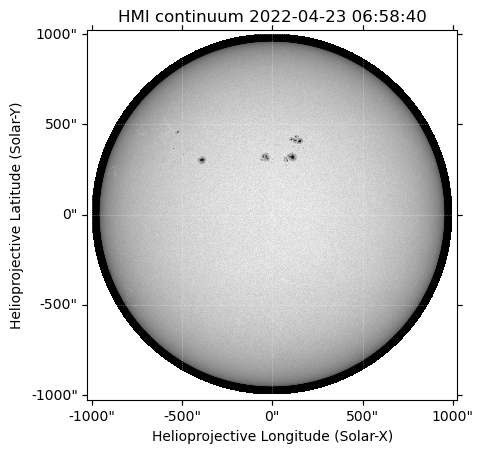

In [20]:
SolarMap.plot(interpolation = 'none') #we need to make sure the data doesn't get interpolated before plotting

One of the benefits of using SunPy maps is when a map is created it pulls information from the header. That's how it knows our data is an HMI continuum image taken on April 23, 2022 at 6:58:40 TAI. It also constructs a coordinate frame from the header information (this is what I meant when I said SunPy maps are spatially aware.)

The default coordinate frame for this data is the Helioprojective cartesian (HPC) coordinate frame as indicated by the labels (it is NOT longitude and latitiude, that is an error). You can imagine this frame as a grid that covers the entire image. The x and y coordinates are in arcseconds (") which is a unit of angular measurement. SunPy in this case converted the pixels to arcseconds based on information in the header (one keyword gives the conversion of pixels to physical length).

Before we go more into coordinate systems lets first talk about units and quantities. SunPy (and AstroPy) have functions that accept or return numbers associated with physical quantities. They do this by using astropy.units.quantities which are objects that represent a number (or an array of numbers) and a unit.

You can create a quantity by multiplying a number by a unit:

In [21]:
import astropy.units as u

length = 10 * u.meter
length

<Quantity 10. m>

You can decompose a quantity  into its unit and numerical value using the .unit and .value attributes:

In [22]:
length.value  

10.0

In [23]:
length.unit

Unit("m")

Similarly to how units are used for representing physical quantities, SunPy uses astropy.coordinates to represent points in physical space. Coordinates are primarily handled with the SkyCoord class, which also makes use of the astropy units system. We also need to import the solar physics specific frames defined in sunpy separately.

Lets create a SkyCoord object to represent a point on the sun. We'll define it in the coordinate frame of our SolarMap (Helioprojective Cartesian).

In [24]:
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

coord = SkyCoord(-250*u.arcsec, -250*u.arcsec, frame=SolarMap.coordinate_frame)  #SkyCoord() creates a skycoord object
#Don't forget your units!

Now that we've created a coordinate lets transform it into another coordinate frame. (This works for frames defined in both AstroPy and SunPy).

Specifically we are transforming to the Heliographic stonyhurst frame which gives the point in latitude and longitude (degrees) on the sun. Think of latitude and longitude lines on Earth except on the sun.

In [25]:
coord.transform_to(frames.HeliographicStonyhurst) #coord.transform_to transforms it to whatever frame that you want

<SkyCoord (HeliographicStonyhurst: obstime=2022-04-23T06:58:40.800, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-16.11075556, -19.85235114, 6.96e+08)>

SkyCoord and all coordinate frames support array coordinates so you can store multiple coordinates in a single object. This is great for situations where you need to apply the same operation to many different coordinates. 

In [26]:
coord = SkyCoord([-500,0,100,400]*u.arcsec, [100, 200, -200, 500]*u.arcsec, frame=SolarMap.coordinate_frame)
coord

<SkyCoord (Helioprojective: obstime=2022-04-23T06:58:40.800, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2022-04-23T06:58:40.800, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01042223, -4.92017603, 1.50431544e+11)>): (Tx, Ty) in arcsec
    [(-500.,  100.), (   0.,  200.), ( 100., -200.), ( 400.,  500.)]>

Lets plot these points on the sun

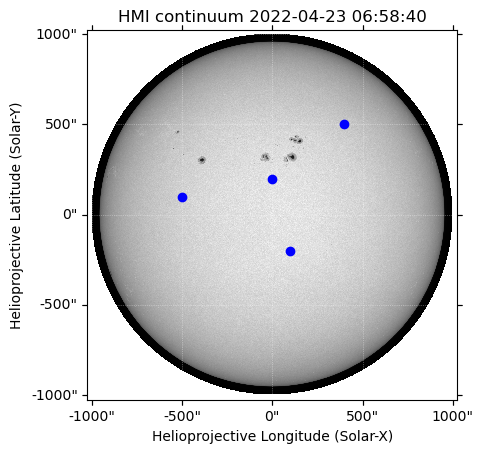

In [27]:
#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=SolarMap)
SolarMap.plot(axes = ax, interpolation = 'none')
ax.plot_coord(coord, "o", color='b')

But what if we wanted to know what pixels these physical coordinates correspond to (or vice versa)? Each Map has an associated World Coordinate System (WCS) which is derived from the underlying metadata. WCS provides the transformation between pixel coordinates of the image and physical or 'world' coordinates. We'll use two methods: world_to_pixel and pixel_to_world. 

Let’s find the pixel location corresponding to the coordinates plotted in the cell above.

In [28]:
pixel_coord = SolarMap.wcs.world_to_pixel(coord)  #the data array is y,x
pixel_coord

(array([1047.49804129, 2047.5       , 2247.50001567, 2847.50100286]),
 array([2247.50060328, 2447.50012536, 1647.49982763, 3047.50383907]))

Lets check our work by plotting the pixel coordinates and making sure they are in the same spot:

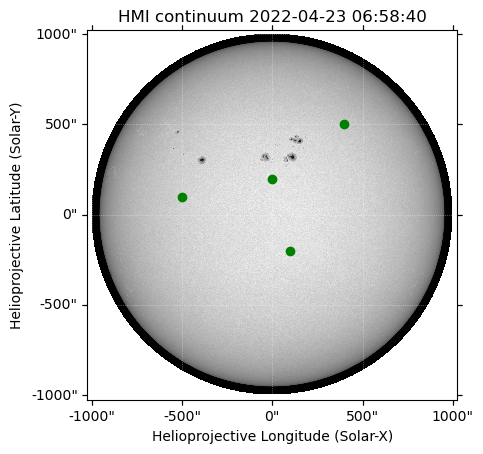

In [29]:
#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=SolarMap)
SolarMap.plot(axes = ax, interpolation = 'none')
ax.plot(pixel_coord[0], pixel_coord[1], 'o', color='g')


We can also plot more than just points. Here is how you can plot lines of latitude and longitude

In [ ]:
#define the latitude and longitude lines (use the HelioGraphic Stonyhurst frame)
lat_0 = 10 * u.deg
lat0 = SkyCoord(np.linspace(-85, 85, 100) * u.deg, np.ones(100) * lat_0, frame=frames.HeliographicStonyhurst)

lon_0 = 30 * u.deg
lon0 = SkyCoord(np.ones(100) * lon_0, np.linspace(-90, 90, 100) * u.deg, frame=frames.HeliographicStonyhurst)

#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=SolarMap)
SolarMap.plot(axes = ax, interpolation = 'none')
ax.plot_coord(lat0, color="y")
ax.plot_coord(lon0, color="r")


help(np.linspace)

In [ ]:
help(np.ones)

You can even plot a quadrangle (green) or box (blue)

In [ ]:
#Defining box using arcseconds (use helioprojective frame)
top_rightb = SkyCoord(250 * u.arcsec, 500 * u.arcsec, frame=SolarMap.coordinate_frame)
bottom_leftb = SkyCoord(-150 * u.arcsec, 200 * u.arcsec, frame=SolarMap.coordinate_frame)

#define quadrangle using degree (use heliographic frame)
bottom_leftq = SkyCoord(-40*u.deg, 5*u.deg,frame=frames.HeliographicStonyhurst)

#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=SolarMap)
SolarMap.plot(axes = ax, interpolation = 'none')
SolarMap.draw_quadrangle(bottom_leftb,axes=ax, top_right=top_rightb, 
                         edgecolor="b",linestyle="--",linewidth=2,)
SolarMap.draw_quadrangle(bottom_leftq, axes=ax, width=20*u.deg, height=30*u.deg,
                    edgecolor='g', linewidth=2)



This project involves polar faculae which are faculae found in the polar regions of the sun. The polar regions are above 70 degrees latitude and below -70 degrees latitude. 

**Exercise 2**

Try making a plot like the one above with the 70 and -70 degrees latitude lines plotted. Also convert the pixel coordinates of the brightest and dimmest pixel you found above to arcseconds. Then plot the brightest point as an 'x' and the dimmest point as an 'o'.

In [ ]:
#code here
#don't use ancillary file  use ic720s file data
#define the latitude and longitude lines (use the HelioGraphic Stonyhurst frame)
lat_north = 70 * u.deg
latnorth = SkyCoord(np.linspace(-85, 85, 100) * u.deg, np.ones(100) * lat_north, frame=frames.HeliographicStonyhurst)

lat_south = -70 * u.deg
latsouth = SkyCoord(np.linspace(-85,85,100) * u.deg, np.ones(100) * lat_south, frame=frames.HeliographicStonyhurst)

#coordinates of brightest and dimmest variables
coordinatesMax = SkyCoord([solutions_max[0][0]]*u.arcsec, [solutions_max[0][1]]*u.arcsec, frame=frames.HeliographicStonyhurst)
coordinatesMin = SkyCoord([solutions_min[0][0]]*u.arcsec, [solutions_min[0][1]]*u.arcsec, frame=frames.HeliographicStonyhurst)
print(coordinatesMax)
print(coordinatesMin)

#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=SolarMap)
SolarMap.plot(axes = ax, interpolation = 'none')
ax.plot_coord(latnorth, color="r")
ax.plot_coord(latsouth, color="r")
ax.plot_coord(coordinatesMax, "x", color='b')
ax.plot_coord(coordinatesMin, "o",color='r', ms=3)


In [ ]:
print(solutions_min)
print(np.nanmin(data))

In [ ]:
solutions_max = np.argwhere(data == np.nanmax(data))
solutions_min = np.argwhere(data == np.nanmin(data))

#grabbing the coordinate values from the array
print(solutions_max[0][0]) #xmax
print(solutions_max[0][1]) #ymax
print(solutions_min[0][0])  #x min
print(solutions_min[0][1]) #y min

If you plotted the latitude lines correctly you'll notice the South Pole is more visible than the North pole in this data. That is caused by the sun being tilted slightly on it's axis. In September the north pole is most visible and in March the south pole it most visible.

Now let's zoom into the South pole by creating a submap.

In [ ]:
#Define the boundaries of the submap using coordinates
top_rightS = SkyCoord(350 * u.arcsec, -850 * u.arcsec, frame=SolarMap.coordinate_frame)
bottom_leftS = SkyCoord(-350 * u.arcsec, -960 * u.arcsec, frame=SolarMap.coordinate_frame)

#Create the submap
submapS = SolarMap.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
submapS.plot(axes = ax, interpolation = 'none')

#If you don't want the axis or grid showing you can use these:
#ax.set_axis_off()
#ax.grid(False)

You see those bright structures? Those are polar faculae which are the main focus of this project. They are a bit hard to see in this data due to limb darkening. This refers to an optical effect in stars that causes the center of the star to be brighter than the edge.

Conveniently there is already some IC data in HelioCloud that has limb darkening removed called the IC_noLimbDark_720s data. This is the dataset I used to detect polar faculae with image segmentation, but more on that later.

**Exercise 3**

Open the IC_noLimbDark_720s data on 2014-09-18 T19:24:00 and 2019-09-14 T16:24:00 and turn them into sunpy maps. (Copy the example object key for the IC_noLimbDark_720s data from the top of the notebook and replace the date and times). Polar faculae are only 3% brighter than the background, so we are going to scale the data up using this equation to make them easier to see:

$$
Scaled Data = (Data ^{15})*100
$$

You can apply this directly to the sunpy map; just replace 'Data' with the name of your sunpy maps. Then plot the two scaled maps zoomed into the North pole. Below is a table of polar faculae coordinates. Convert the pixel coordinates to arcseconds and plot them on the sun.

*Polar Faculae Coordinates 20140918:*

| X [pixels] | Y [pixels] |
|-----------|-------------|
|1566.5570636496548 | 3790.342626338923 |
|2578.3591066595504 |3828.7691196909313 |
|1909.3729608952688 |3842.5712658083626 |

*Polar Faculae Coordinates 20190914:*
| X [pixels] | Y [pixels] |
|-----------|-------------|
|2321.184299353757 | 3767.7952379997014|
|1901.1010662222136 |3878.801163555799|
|2144.812322772056|3908.365649881144|


In [ ]:
#Your code here

fobj3 = s3c.get_object(Bucket=mybucket,Key= 'sdo/hmi/20140918/Ic_noLimbDark/sdo_hmi_h2_20140918T192400_Ic_noLimbDark_v1.fits')

#scaleddata=pow(data,15)*100
rawdata3 = fobj3['Body'].read()
bdata3 = io.BytesIO(rawdata3) 
hdul3 = astropy.io.fits.open(bdata3,memmap=False)

#make data into sunpy map

ICMap = sunpy.map.Map(hdul3[1].data, hdul3[1].header)

#PFe coordinates converted to arcseconds
scaledMap=(ICMap**15)*100
#makes a skycoord object
#giving it the pixel coordinates and telling it to convert to world coordinates
#World Coordinate frame (wcs)
xy=scaledMap.wcs.pixel_to_world([1566.5570636496548, 2578.3591066595504, 1909.3729608952688],[3790.342626338923, 3828.7691196909313, 3842.5712658083626])

#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=scaledMap)
scaledMap.plot(axes = ax, interpolation = 'none')
ax.plot_coord(xy, "x", color='b', ms=7)

#Define the boundaries of the submap using coordinates
top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=scaledMap.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 960 * u.arcsec, frame=scaledMap.coordinate_frame)

#Create the submap
submapS = scaledMap.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy, "x", color='b', ms=7)
submapS.plot(axes = ax, interpolation = 'none')

In [ ]:
#make data into sunpy map

fobj4 = s3c.get_object(Bucket=mybucket,Key= 'sdo/hmi/20190914/Ic_noLimbDark/sdo_hmi_h2_20190914T162400_Ic_noLimbDark_v1.fits')

rawdata4 = fobj4['Body'].read()
bdata4 = io.BytesIO(rawdata4) 
hdul4 = astropy.io.fits.open(bdata4,memmap=False)

#make data into sunpy map
ICMap2 = sunpy.map.Map(hdul4[1].data, hdul4[1].header)

scaledMap2=(ICMap2**15)*100
xy2=scaledMap2.wcs.pixel_to_world([2321.184299353757, 1901.1010662222136, 2144.812322772056], [3767.7952379997014, 3878.801163555799, 3908.365649881144])

#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=ICMap2)
scaledMap2.plot(axes = ax, interpolation = 'none')

ax.plot_coord(xy2, "x", color='b', ms=7)

#Define the boundaries of the submap using coordinates
top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=scaledMap2.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 960 * u.arcsec, frame=scaledMap2.coordinate_frame)

#Create the submap
submapS = scaledMap2.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy2, "x", color='b', ms=7)
submapS.plot(axes = ax, interpolation = 'none')


Next, for the same two times, find the corresponding vector B field data in the radial direction (Br). Open and plot the data zoomed into the same view you used above. No scaling is needed for this data. However, the default colormap might be hard to see so you may need to change it. Pick a diverging colormap from matplotlib or cmasher if you have it installed and use it instead. Then find the radial magnetic field value of the polar faculae using the coordinates from the table above (The data array is shaped (Y,X) btw).

You can change the colormap in this line like so:
>submapS.plot(axes = ax, interpolation = 'none', cmap = 'name of colormap you pick')

A quick note on colormaps and picking colors for graphs in general. A good scientific colormap is often described as *perceptually uniform sequential* which mean the colormap is perceived as uniformly changing in lightness and saturation. This is important so data values are interpreted correctly by the viewer without giving false information (if you want to learn more check out [this article](https://mycartablog.com/2012/10/14/the-rainbow-is-deadlong-live-the-rainbow-part-4-cie-lab-heated-body/)). You should also pick a color map that is easy to read for people with color-vision deficiencies (blue and red is usually safe).

In [ ]:
#your code here
#magnetic field map doesn't need to be scaled
#HMI Radial magnetic field component: sdo/hmi/20221002/B/sdo_hmi_h2_20221002T003600_Br_v1.fits
# 2014-09-18 T19:24:00
fobj5 = s3c.get_object(Bucket=mybucket,Key= 'sdo/hmi/20140918/B/sdo_hmi_h2_20140918T192400_Br_v1.fits')

#submapS.plot(axes = ax, interpolation = 'none', cmap = 'name of colormap you pick')
rawdata5 = fobj5['Body'].read()
bdata5 = io.BytesIO(rawdata5) 
hdul5 = astropy.io.fits.open(bdata5,memmap=False)

ICMap = sunpy.map.Map(hdul5[1].data, hdul5[1].header)

#PFe coordinates converted to arcseconds
#makes a skycoord object
#giving it the pixel coordinates and telling it to convert to world coordinates
#World Coordinate frame (wcs)
xy=ICMap.wcs.pixel_to_world([1566.5570636496548, 2578.3591066595504, 1909.3729608952688],[3790.342626338923, 3828.7691196909313, 3842.5712658083626])

#plot the figure

#Define the boundaries of the submap using coordinates
top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 960 * u.arcsec, frame=ICMap.coordinate_frame)

#Create the submap
submapS = ICMap.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy, "x", color='b', ms=7)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')

In [ ]:
#2019-09-14 T16:24:00
fobj6 = s3c.get_object(Bucket=mybucket,Key= 'sdo/hmi/20190914/B/sdo_hmi_h2_20190914T162400_Br_v1.fits')

#submapS.plot(axes = ax, interpolation = 'none', cmap = 'name of colormap you pick')

#submapS.plot(axes = ax, interpolation = 'none', cmap = 'name of colormap you pick')
rawdata6 = fobj6['Body'].read()
bdata6 = io.BytesIO(rawdata6) 
hdul6 = astropy.io.fits.open(bdata6,memmap=False)

ICMap2 = sunpy.map.Map(hdul6[1].data, hdul6[1].header)

#PFe coordinates converted to arcseconds
#makes a skycoord object
#giving it the pixel coordinates and telling it to convert to world coordinates
#World Coordinate frame (wcs)
xy2=ICMap2.wcs.pixel_to_world([2321.184299353757, 1901.1010662222136, 2144.812322772056], [3767.7952379997014, 3878.801163555799, 3908.365649881144])

#plot the figure

#Define the boundaries of the submap using coordinates
top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap2.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 960 * u.arcsec, frame=ICMap2.coordinate_frame)

#Create the submap
submapS = ICMap2.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy2, "x", color='b', ms=7)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')

For more info on coordinates check out SunPy's documentation [here](https://docs.sunpy.org/en/stable/tutorial/coordinates.html). SunPy also has their own tutorial [here](https://docs.sunpy.org/en/stable/tutorial/index.html)

If you want some examples of what you can do with SunPy check out their example gallery [here](https://docs.sunpy.org/en/stable/generated/gallery/index.html).

## Pandas

For this project we are going to want to look at multiple images over time. There are two options to query the data. You could use the registry files which are csv files listing all object keys in HelioCloud. Or you could utilize the fact that the object keys have the same format (i.e all intensity continuum images have the format sdo/hmi/YYYYMMDD/Ic/sdo_hmi_h2_YYYYMMDDThhmmss_Ic_v1.fits) and create the object keys by combining strings.

I recommend the second option because it is fairly simple to do using pandas datetime. 

You can define a datetime object like so:

In [ ]:
header

In [ ]:
from datetime import datetime, timedelta

time = datetime(2019,2,1) #datetime for  hour zero on February 1st, 2019

You can then convert the datetime object to a string in a format of your choosing like this:

In [ ]:
time.strftime("%Y-%m-%d")

or this:

In [ ]:
time.strftime("%m.%d.%Y")

or even this:

In [ ]:
time.strftime("%B, %d in the year %Y was a %A")

You can also use datetime to create a list of dates a certain interval apart within a range

First set the start and end date:

In [ ]:
start_dt = datetime(2019,2,1,0)
end_dt = datetime(2019,2,1,23) #note hours are 0-23,

Then set the interval you want between each time:

In [ ]:
delta = timedelta(hours = 1)

#timedelta can be: days=?, seconds=?, microseconds=?, milliseconds=?, minutes=?, hours=?, weeks=?

Then iterate through and make your list:

In [ ]:
#Then iterate through and add to list
list_of_dates = []
while start_dt <= end_dt:
    # add current date to list by converting it to iso format
    list_of_dates.append(start_dt.strftime("%Y-%m-%d %H:00"))
    # increment start date by timedelta
    start_dt += delta
    
print(list_of_dates)

**Exercise 4** 

Using the hmi.IC_720s data: Plot SDO's radial velocity (velocity of SDO away from the sun) every 12 minutes over the course of two days. Also plot the mean value of all valid pixels every hour during the same two days.

(Hint: Look at the header. Also the 720s data only exists for these times: hh:00:00, hh:12:00, hh:24:00, hh:36:00, or hh:48:00. This is true for every 720s series.)

Note that there are some times where data may be missing. This could happen for many reasons, but often times it is because SDO's view gets blocked by either the moon or the Earth during it's eclipse season. One downside of creating the strings yourself is you don't know if the data is actually in HelioCloud or not (if it isn't it will throw an error). It's easy to get around this using python's 'Try and Except' statements.

In [ ]:
header1 = hdul7[1].header

In [ ]:
header1

In [ ]:
#hmi.IC_720s dataPlot SDO's radial velocity (velocity of SDO away from the sun) every 12 minutes over the course of two days 
#plot the mean value of all valid pixels every hour during the same two days.
#create a loop that goes through 24 hrs and the 5 times then close the file and 
#radial velocity-measures speed of the satellite going back and forth
times=[]
rv_data=[]
mean_nums=[]

    
for day in ['18', '19']:
    for hour in range(24):
        hh="%.2d" % hour
        for mins in range(0,49,12):
            mm="%.2d" % mins
            fileName='sdo/hmi/202209' + day +'/Ic/sdo_hmi_h2_202209' + day +'T' + hh+ mm + '00_Ic_v1.fits'
            #print(fileName)

            fobj7 = s3c.get_object(Bucket=mybucket,Key= fileName)
            rawdata7 = fobj7['Body'].read()
            bdata7 = io.BytesIO(rawdata7) 
            hdul7 = astropy.io.fits.open(bdata7,memmap=False)
            header1=hdul7[1].header
            rv_data.append(header1['OBS_VR'])
            times.append(header1['T_REC'])
            mean_nums.append(header1['DATAMEAN'])
            
            
print(rv_data)


In [ ]:
import datetime

times_for_rv=[]
for time in times:
    times_for_rv.append(datetime.datetime.strptime(time[:-8], '%Y.%m.%d_%H:%M:%S'))
#print(times)
#print(times_for_rv)

new_times_arr=[]
for val in times_for_rv:
    new_times_arr.append((val-times_for_rv[0])/timedelta(hours=1))
print(new_times_arr)



In [ ]:

#plot SDO's radial velocity (velocity of SDO away from the sun) every 12 minutes over the course of two days

fig1 = plt.figure(figsize = (8,6),layout="constrained")

plt.plot(new_times_arr, rv_data, label='radial velocity')
plt.xlabel("Time since " + str(times_for_rv[0]) + " (hours)")
plt.ylabel("Radial Velocity (km/s)")
plt.title("SDO Radial Velocity for two days")
plt.grid()
    
plt.legend(title='Radial Velocity')
plt.show()

#plot the mean value of all valid pixels every hour during the same two days.

In [ ]:
fig2=plt.figure(figsize = (8,6),layout="constrained")
plt.plot(new_times_arr,mean_nums, label='Mean pixel value')
plt.xlabel("Time since " + str(times_for_rv[0]) + " (hours)")
plt.ylabel("Mean value of all pixels)")
plt.title("SDO pixel values for two days")
plt.grid()
    
plt.legend(title='Mean pixel values')
plt.show()

In [ ]:
#plot the mean value of all valid pixels every hour during the same two days.
#T-REC
import datetime
timerv=header1['T_REC']

for time in times:
    timerv=header1['T_REC']
    

In [ ]:
for hour in range(24):
    #hours=str(hour)
    strhr="%.2d" % hour
    print(strhr)
print(type("%.2d" % hour))


In [ ]:
for mins in range(0,49,12):
    #hours=str(hour)
    mm="%.2d" % mins
    print(mm)
print(type(mm))

In [ ]:
header=hdul7[1].header
header
#header['OBS_VR']



In [ ]:
#sdo/hmi/20221002/V/sdo_hmi_h2_20221002T000000_V_v1.fits

## Polar Faculae Data

Now that I've gone over the basics of SunPy and working with solar data, I'll go over the polar faculae data that I collected.

There is the PFe count data which was gathered using the script here: efs/jrclark/PFe-Counting.ipynb.
This code first averaged the hmi.Ic_noLimbDark_720s data over an hour and then uses [image segmentation](https://photutils.readthedocs.io/en/stable/segmentation.html) to count PFe in the North and South pole. The image segmentation function returns a 'segmentation image' which is an array showing where PFe were detected (each PFe has a unique positive interger value).

The 3600s averaged data and segmentation images for the North and South pole were saved as fit files in the following folders (the fits files are sorted in subfolders):

*The 3600s averaged data:*
>efs/jrclark/Saved FITS/Avg Maps/YYYY_MM

*The segmentation images (North and South respectively):*
>efs/jrclark/Saved FITS/Northern PFe Masks/YYYY_MM <br>
>efs/jrclark/Saved FITS/Southern PFe Masks/YYYY_MM

The count data itself was saved as csv (comma separated value) files in the following locations:

*The hourly PFe count data (raw data) was saved here:*
>efs/jrclark/PFe Data/Hourly

*The daily count averaged data are saved here:*
>efs/jrclark/PFe Data/Daily_Averages

There are also PFe catalogs which have information about individual PFe such as the magnetic field, intensity, area, and location. These were created using the script in efs/jrclark/PFe_Catalogs.ipynb.

Unlike the count data, there are only catalogs for one month of the year (Northern PFe in September, Southern PFe in March). A single catalog is made for each image (5 chosen randomly for each day in a month) and have information for every individual PFe detected in that image. This data can be found here (Also have yearly subfolders):

>efs/jrclark/PFe Data/PFe_Catalogs/N PFe Characteristics/YYYY_MM <br>
>efs/jrclark/PFe Data/PFe_Catalogs/S PFe Characteristics/YYYY_MM

Let's open one of the count CSV files using pandas dataframes:

In [ ]:
df = pd.read_csv('/efs/jrclark/PFe Data/Hourly/Sep_2019_Counts.csv')
df

The pandas dataframe is a structure that contains two dimensional data and it's corresponding labels. The row names are given in bold on the right most column and the column names are given in bold across the top. Dataframes are similar to excel spreadsheets and make working with data easier. 

Each row in the hourly count data is a single hour. The first row is the date and time. Just the day is given in the second row. The PFe counts are given in the 3rd and 4th column called "North Count" and "South Count".

You can use the column names to call specific columns using either method below:

In [ ]:
df.Day

In [ ]:
df['North Count']

It is also possible to call specific rows or a group of rows using the row indices. Note you are calling rows by their row labels not indexing. Negative numbers won't work.

In [ ]:
df.iloc[6]

In [ ]:
df.iloc[10:20]

You can also slice single columns instead of the entire dataframe like so:

In [ ]:
df.Day[5:10]

You can easily convert a column, section of a column, or row to a list by adding .tolist()

In [ ]:
df.Day[5:10].tolist()

In [ ]:
df.iloc[6].tolist()

Some times, like row 6, don't have any PFe counts recorded. The error column indicates why no PFe were counted. Lets take a look at some of the possible errors given. To do this we will use .unique() which gives all the unique values that appear in a column.

In [ ]:
df['Error'].unique()

We can see only 3 errors were given in this particular dataframe: nan, N_Maps < 5, and No Map24. 'nan' means no error was given so PFe were counted. 'No Map24' means the data at 24 minutes past the hour was missing so the other data couldn't be derotated to that time. 'N_Maps < 5' means that at least one of the five 720s data in an hour was missing. (I didn't derotate data if one of the maps were missing. You'll note one of the columns is called N_Maps which indicates how many of the 720s data were collected in that hour (between 0 and 5).

If you are looking at data from before 2013 you might notice an error called "Keys DNE". Originally when I ran the code I was using list files to gather the data keys. Sometimes the list file would have an object key that didn't actually exist in HelioCloud. (This is why I'm not having you use the registry files...)

<hr>

The count data is a time series data (we have counts over time). I recommend using pandas datetimes for the x axis if you want to plot the data. This makes it so the plot is aware the x axis are dates so you don't have to worry about it. 


In [ ]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, YearLocator, MonthLocator

fig, ax = plt.subplots()

#Convert portion of datetime column to pandas datetime objects
dates = pd.to_datetime(df['Datetime'])

#Make the plot
ax.plot(dates, df['North Count'])

#format x axis labels:
#set major axis to once every two years on September 1st
ax.xaxis.set_major_locator(DayLocator(interval=7))
#set minor axis to march and september every year
ax.xaxis.set_minor_locator(DayLocator())
#format the major axis labels should be in
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

fig.autofmt_xdate()           

**Exercise 5**

See if you can plot the entire Northern and Southern PFe count data (2010-2022) as a scatter plot using matplotlib. Make sure your plot has a title, axis labels, grid lines, and a legend. If you don't know how to do this check out matplotlib's documentation and examples.

In [ ]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, YearLocator, MonthLocator

PATH='/efs/jrclark/PFe Data/Hourly/'

fileNames = os.listdir(PATH)
#print(fileNames)

fileNames = [file for file in fileNames if '.csv' in file]

data_list=[]
for file in fileNames:

    ### Read .csv file and append to list
    df = pd.read_csv(PATH + file)
    data_list.append(df)

#combining all csv files to plot
tot_data = pd.concat(data_list)
tot_data['Datetime'] = pd.to_datetime(tot_data['Datetime'])
    
#fig, ax = plt.subplots()
plt.xlabel("Year (2010-2022)")
plt.ylabel("PFe count")
plt.title("Northern and Southern PFe count data (2010-2022)")
plt.grid()

#plotting the north and south data
plt.scatter(tot_data['Datetime'], tot_data['North Count'], label='North Count')
plt.scatter(tot_data['Datetime'], tot_data['South Count'], label='South Count')
    
plt.legend(title='North and South PFe count')
plt.show()


Lets switch gears and look at one of the PFe catalogs.

In [ ]:
df = pd.read_csv('/efs/jrclark/PFe Data/PFe_Catalogs/N PFe Characteristics/2020_09/PFe_Catalog_20200903T0024.csv')
df

These catalogs are kinda long so you may need to scroll to see the columns farther to the right. Each row corresponds to an individual faculae detected in a image (the time is indicated in the filename). The first row called "PFe label" contains the label the PFe has in the segmentation image. (Please note the catalogs were not created using the segmentation images from the 3600s data I have saved. They were created using 720s segmentation images because they aligned with the other data products better.)

The next two columns called 'X Centroid' and 'Y Centroid' give the pixel coordinate of the center of each PFe. The 'Lat' and 'Lon' columns give the center of the PFe in heliographic coordinates. Mu is the center to limb angle. (The Lat,Lon, and Mu values were gathered from the ancillary files. Since the ancillary files from 2015-2019 are missing, those catalogs don't have these columns yet.)

Area gives the PFe's size in pixels. The rest of the columns give the maximum pixel value (Max_???), minimum pixel value (Min_???),The flux through a polar faculae (Flux_???) which is the sum of all the pixel values in a polar faculae, and the average flux (Avg_???) which is flux divided by pixel area calculated from multiple different HMI 720s data. These include the intensity, the line-of-sight magnetic field, and the vector B field data in the radial, theta, and phi direction. (B is magnetic field).

If you want to look at a subset of the data (for instance only PFe greater than 10 pixels) you can create a new dataframe like so:

In [ ]:
dfnew = df[df['Area'] >10]
dfnew

Notice the row names don't change in the new dataframe.

You can also create subsets based on multiple conditions. Lets say you only want PFe that are smaller than 20 pixels and have an average radial magnetic flux of at least 250 Gauss:

In [ ]:
dfnew2 = df[(df['Area'] < 10) & (df['Avg_Br'] > 250)]
dfnew2

If you want to learn more about pandas and what else you can do with dataframes check out their documentation [here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html).

**Exercise 6**

For one final exercise please complete the following tasks:

1) For solar cycle minimum (2019) pick a time in March and September and make a plot zoomed into the southern and northern polar region respectively. Plot the coordinates of the 20 PFe with the largest area and the 20 PFe with the largest radial magnetic field (average flux). Make sure you use different markers. Do the same for solar cycle maximum (2014). 

2) Make a histogram of the radial magnetic field of polar faculae in March 2014 and another for March 2019. You should use the average flux in Br for all PFe in all the southern PFe catalogs from March. Don't worry about double counting faculae. Do the same for northern PFe in September of 2014 and 2019. 

3) Make a movies of the Northern polar region (zoomed in) for a week in September using the segmentation images saved in my directory (this folder: efs/jrclark/Saved FITS/Northern PFe Masks) and the radial vector B data. (Hint: Don't actually make the movie in python. Instead save a sequence of images which you can download and convert into a movie using some sort of movie maker. You can save a matplotlib plot as a png file using:
>plt.savefig('/efs/your_directory/name_of_file.png', bbox_inches = 'tight'))

In [ ]:
#SOLAR MIN prt 1 pick value from 2020 in March (southern)

fobj8= s3c.get_object(Bucket=mybucket,Key= 'sdo/hmi/20200302/Ic_noLimbDark/sdo_hmi_h2_20200302T022400_Ic_noLimbDark_v1.fits')

#scaleddata=pow(data,15)*100
rawdata8 = fobj8['Body'].read()
bdata8 = io.BytesIO(rawdata8) 
hdul8 = astropy.io.fits.open(bdata8,memmap=False)

In [ ]:
#make data into sunpy map

ICMap8 = sunpy.map.Map(hdul8[1].data, hdul8[1].header)

In [ ]:
#plot 20 pfe with the largest area
pfdataframe= pd.read_csv('/efs/jrclark/PFe Data/PFe_Catalogs/S PFe Characteristics/2020_03/PFe_Catalog_20200302T0224.csv')
df_extract=pfdataframe.sort_values(by="Area", ascending=False)
#df_extract
#pfdataframe.columns


pfeareaxycoord=[]
data_cond = df_extract[['X_Centroid', 'Y_Centroid', 'Area']]
extracted_data = data_cond.head(20)
#print(extracted_data)
#print(type(extracted_data))

x_centroid_list=[]
y_centroid_list=[]

for index, row in extracted_data.iterrows():
    # Convert the row to a list
    row_list = row.tolist()
    
    # Append the values to respective lists
    x_centroid_list.append(row_list[0])
    y_centroid_list.append(row_list[1])
    #print(row_list)
    
print(x_centroid_list)
print(y_centroid_list)


In [ ]:
#plot 20 pfe with the largest radial magnetic field (average flux)
pfdataframe= pd.read_csv('/efs/jrclark/PFe Data/PFe_Catalogs/S PFe Characteristics/2020_03/PFe_Catalog_20200302T0224.csv')
df_extract=pfdataframe.sort_values(by="Avg_Br", ascending=False)
#df_extract
#pfdataframe.columns


pfeareaxycoord=[]
data_cond = df_extract[['X_Centroid', 'Y_Centroid', 'Avg_Br']]
extracted_data = data_cond.head(20)
#print(extracted_data)
#print(type(extracted_data))

x_centroid_listbr=[]
y_centroid_listbr=[]

for index, row in extracted_data.iterrows():
    # Convert the row to a list
    row_list = row.tolist()
    
    # Append the values to respective lists
    x_centroid_listbr.append(row_list[0])
    y_centroid_listbr.append(row_list[1])
    #print(row_list)
    
print(x_centroid_listbr)
print(y_centroid_listbr)

In [ ]:
#PFe coordinates converted to arcseconds
#scaledMap8=(ICMap8**15)*100
#makes a skycoord object
#giving it the pixel coordinates and telling it to convert to world coordinates
#World Coordinate frame (wcs)
xy8=ICMap8.wcs.pixel_to_world(x_centroid_list,y_centroid_list)
xy9=ICMap8.wcs.pixel_to_world(x_centroid_listbr,y_centroid_listbr)

#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=ICMap8)
ICMap8.plot(axes = ax, interpolation = 'none')
ax.plot_coord(xy8, "x", color='b', ms=3)
ax.plot_coord(xy9, "x", color='k', ms=3)

In [ ]:

#Define the boundaries of the submap North using coordinates
top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap8.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=ICMap8.coordinate_frame)

#Create the submap North
submapS = ICMap8.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy8, "x", color='b', ms=5)
ax.plot_coord(xy9, "x", color='k', ms=5)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')


In [ ]:

#Define the boundaries of the submap South using coordinates
top_rightS = SkyCoord(450 * u.arcsec, -840 * u.arcsec, frame=ICMap8.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, -970 * u.arcsec, frame=ICMap8.coordinate_frame)

#Create the submap South
submapS = ICMap8.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy8, "x", color='b', ms=5)
ax.plot_coord(xy9, "+", color='k', ms=7)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')

In [ ]:
#SOLAR MIN prt 1 pick value from 2020 in September (northern)

fobj9= s3c.get_object(Bucket=mybucket,Key= 'sdo/hmi/20200902/Ic_noLimbDark/sdo_hmi_h2_20200902T022400_Ic_noLimbDark_v1.fits')

rawdata9 = fobj9['Body'].read()
bdata9 = io.BytesIO(rawdata9) 
hdul9 = astropy.io.fits.open(bdata9,memmap=False)

In [ ]:
#make data into sunpy map

ICMap9 = sunpy.map.Map(hdul9[1].data, hdul9[1].header)

In [ ]:
#plot 20 pfe with the largest area
pfdataframe= pd.read_csv('/efs/jrclark/PFe Data/PFe_Catalogs/N PFe Characteristics/2020_09/PFe_Catalog_20200902T1024.csv')

df_extract=pfdataframe.sort_values(by="Area", ascending=False)


pfeareaxycoord=[]
data_cond = df_extract[['X_Centroid', 'Y_Centroid', 'Area']]
extracted_data = data_cond.head(20)
#print(extracted_data)
#print(type(extracted_data))

x_centroid_list=[]
y_centroid_list=[]

for index, row in extracted_data.iterrows():
    # Convert the row to a list
    row_list = row.tolist()
    
    # Append the values to respective lists
    x_centroid_list.append(row_list[0])
    y_centroid_list.append(row_list[1])
    #print(row_list)
    
print(x_centroid_list)
print(y_centroid_list)

In [ ]:
#plot 20 PFe with the largest radial magnetic field (average flux)
pfdataframe= pd.read_csv('/efs/jrclark/PFe Data/PFe_Catalogs/N PFe Characteristics/2020_09/PFe_Catalog_20200902T1024.csv')
df_extract=pfdataframe.sort_values(by="Avg_Br", ascending=False)
#df_extract
#pfdataframe.columns

pfeareaxycoord=[]
data_cond = df_extract[['X_Centroid', 'Y_Centroid', 'Avg_Br']]
extracted_data = data_cond.head(20)
#print(extracted_data)
#print(type(extracted_data))

x_centroid_listbr=[]
y_centroid_listbr=[]

for index, row in extracted_data.iterrows():
    # Convert the row to a list
    row_list = row.tolist()
    
    # Append the values to respective lists
    x_centroid_listbr.append(row_list[0])
    y_centroid_listbr.append(row_list[1])
    #print(row_list)
    
print(x_centroid_listbr)
print(y_centroid_listbr)

In [ ]:
#PFe coordinates converted to arcseconds
#scaledMap8=(ICMap8**15)*100
#makes a skycoord object
#giving it the pixel coordinates and telling it to convert to world coordinates
#World Coordinate frame (wcs)
xy8=ICMap9.wcs.pixel_to_world(x_centroid_list,y_centroid_list)
xy9=ICMap9.wcs.pixel_to_world(x_centroid_listbr,y_centroid_listbr)

#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=ICMap9)
ICMap9.plot(axes = ax, interpolation = 'none')
ax.plot_coord(xy8, "x", color='b', ms=3)
ax.plot_coord(xy9, "x", color='k', ms=3)

In [ ]:

#Define the boundaries of the submap North using coordinates
top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap9.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=ICMap9.coordinate_frame)

#Create the submap North
submapS = ICMap9.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy8, "x", color='b', ms=5)
ax.plot_coord(xy9, "+", color='k', ms=5)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')


In [ ]:

#Define the boundaries of the submap South using coordinates
top_rightS = SkyCoord(450 * u.arcsec, -840 * u.arcsec, frame=ICMap9.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, -970 * u.arcsec, frame=ICMap9.coordinate_frame)

#Create the submap South
submapS = ICMap9.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy8, "x", color='b', ms=5)
ax.plot_coord(xy9, "+", color='k', ms=7)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')

In [ ]:
#NOW FOR 2014 MAR
#SOLAR MIN prt 1 pick value from 2014 in March (southern)

fobjct= s3c.get_object(Bucket=mybucket,Key= 'sdo/hmi/20140302/Ic_noLimbDark/sdo_hmi_h2_20200302T102400_Ic_noLimbDark_v1.fits')

#scaleddata=pow(data,15)*100
rawdata8 = fobjct['Body'].read()
bdata8 = io.BytesIO(rawdata8) 
hdul8 = astropy.io.fits.open(bdata8,memmap=False)


In [ ]:
#make data into sunpy map
ICMap8 = sunpy.map.Map(hdul8[1].data, hdul8[1].header)

In [ ]:
#plot 20 pfe with the largest area
pfdataframe= pd.read_csv('/efs/jrclark/PFe Data/PFe_Catalogs/S PFe Characteristics/2020_03/PFe_Catalog_20200302T0224.csv')
df_extract=pfdataframe.sort_values(by="Area", ascending=False)
#df_extract
#pfdataframe.columns


pfeareaxycoord=[]
data_cond = df_extract[['X_Centroid', 'Y_Centroid', 'Area']]
extracted_data = data_cond.head(20)
#print(extracted_data)
#print(type(extracted_data))

x_centroid_list=[]
y_centroid_list=[]

for index, row in extracted_data.iterrows():
    # Convert the row to a list
    row_list = row.tolist()
    
    # Append the values to respective lists
    x_centroid_list.append(row_list[0])
    y_centroid_list.append(row_list[1])
    #print(row_list)
    
print(x_centroid_list)
print(y_centroid_list)

In [ ]:
#plot 20 pfe with the largest radial magnetic field (average flux)
pfdataframe= pd.read_csv('/efs/jrclark/PFe Data/PFe_Catalogs/S PFe Characteristics/2020_03/PFe_Catalog_20200302T0224.csv')
df_extract=pfdataframe.sort_values(by="Avg_Br", ascending=False)
#df_extract
#pfdataframe.columns


pfeareaxycoord=[]
data_cond = df_extract[['X_Centroid', 'Y_Centroid', 'Avg_Br']]
extracted_data = data_cond.head(20)
#print(extracted_data)
#print(type(extracted_data))

x_centroid_listbr=[]
y_centroid_listbr=[]

for index, row in extracted_data.iterrows():
    # Convert the row to a list
    row_list = row.tolist()
    
    # Append the values to respective lists
    x_centroid_listbr.append(row_list[0])
    y_centroid_listbr.append(row_list[1])
    #print(row_list)
    
print(x_centroid_listbr)
print(y_centroid_listbr)

In [ ]:
#PFe coordinates converted to arcseconds
xy8=ICMap8.wcs.pixel_to_world(x_centroid_list,y_centroid_list)
xy9=ICMap8.wcs.pixel_to_world(x_centroid_listbr,y_centroid_listbr)

#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=ICMap8)
ICMap8.plot(axes = ax, interpolation = 'none')
ax.plot_coord(xy8, "x", color='b', ms=3)
ax.plot_coord(xy9, "x", color='k', ms=3)

In [ ]:
#Define the boundaries of the submap North using coordinates
top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap8.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=ICMap8.coordinate_frame)

#Create the submap North
submapS = ICMap8.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy8, "x", color='b', ms=5)
ax.plot_coord(xy9, "x", color='k', ms=5)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')

In [ ]:
#Define the boundaries of the submap South using coordinates
top_rightS = SkyCoord(450 * u.arcsec, -840 * u.arcsec, frame=ICMap9.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, -970 * u.arcsec, frame=ICMap9.coordinate_frame)

#Create the submap South
submapS = ICMap9.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
ax.plot_coord(xy8, "x", color='b', ms=5)
ax.plot_coord(xy9, "+", color='k', ms=7)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')

In [ ]:
#QUESTION 2
#histogram of radial B of polar faculae in March 2014 and another for March 2019.
#You should use the average flux in Br for all PFe in all the southern PFe catalogs from March.
#Don't worry about double counting faculae. Do the same for northern PFe in September of 2014 and 2019.
#how many diff values the pfe can be distributed over

In [ ]:
#MARCH  2020 RADIAL B OF PFE

path='/efs/jrclark/PFe Data/PFe_Catalogs/S PFe Characteristics/2020_03/'

fileName = os.listdir(path)
#print(fileName)
marradpfe=[]
fileName = [file for file in fileName if '.csv' in file]

#marradpfe=[]
for file in fileName:

    ### Read .csv file and append to list
    datfr = pd.read_csv(path + file)
    dt_slice=datfr[['Avg_Br']]
    #print(dt_slice)
    for index, row in dt_slice.iterrows():
    # Convert the row to a list
            row_to_list = row.tolist()
    # Append the values to respective lists
            marradpfe.append(row_to_list[0])
            #print(row_to_list)
#print(marradpfe)

plt.xlabel("March 2020")
plt.ylabel("Radial Magnetic Field")
plt.title("Radial Magnetic field of Southern PFe March 2020")
plt.grid()
plt.hist(marradpfe) #x is mag field bins y is number of pfe with that mag field
plt.show()

In [ ]:

path='/efs/jrclark/PFe Data/PFe_Catalogs/S PFe Characteristics/2014_03/'

fileName = os.listdir(path)
#print(fileName)
marradpfe=[]
fileName = [file for file in fileName if '.csv' in file]

#marradpfe=[]
for file in fileName:

    ### Read .csv file and append to list
    datfr = pd.read_csv(path + file)
    dt_slice=datfr[['Avg_Br']]
    #print(dt_slice)
    for index, row in dt_slice.iterrows():
    # Convert the row to a list
            row_to_list = row.tolist()
    # Append the values to respective lists
            marradpfe.append(row_to_list[0])
            #print(row_to_list)
#print(marradpfe)

plt.xlabel("March 2014")
plt.ylabel("Radial Magnetic Field")
plt.title("Radial Magnetic field of Southern PFe March 2014")
plt.grid()
plt.hist(marradpfe) #x is mag field bins y is number of pfe with that mag field
plt.show()

In [ ]:
#NOTES FOR exercise 3 need to put plt.close() after you save figure
#open one of the maps, zoom in to polar region
#don't need to change zoom window use a for loop to save all of the images
#if you see only a couple pfe on the poles change cmap to veridis. There should be a bunch of pfe
#set the bad/nan values to black
#create new folder in your directory, save images to folder as png files  to save shift click and continue to hold shift then click on item below
#can only download ten things at a time

#DIRECTIONS
#Make a movies of the Northern polar region (zoomed in) for a week in September using the segmentation images saved in my directory 
#(this folder: efs/jrclark/Saved FITS/Northern PFe Masks) and the radial vector B data. (Hint: Don't actually make the movie in python. 
#Instead save a sequence of images which you can download and convert into a movie using some sort of movie maker. You can save a 
#matplotlib plot as a png file using:
#plt.savefig('/efs/your_directory/name_of_file.png', bbox_inches = 'tight'))


import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Directory containing segmentation images and radial vector B data
segmentation_dir = '/efs/jrclark/Saved FITS/Northern PFe Masks/'
output_dir = '/efs/okome7/movie_images/'

# Create output directory if it doesn't exist
#if not os.path.exists(output_dir):
 #   os.makedirs(output_dir)

# List all FITS files in the segmentation directory
segmentation_files = sorted([f for f in os.listdir(segmentation_dir) if f.endswith('.fits')])


def load_fits_data(file_path):
    with fits.open(file_path) as hdul:
        data = hdul[0].data
    return data

# Loop through the segmentation files and create images
for i, seg_file in enumerate(segmentation_files):
    # Load segmentation data
    seg_data = load_fits_data(os.path.join(segmentation_dir, seg_file))
    
    # Load the corresponding radial vector B data (assuming a similar naming convention)
    b_file = seg_file.replace('Masks', 'B')  # Adjust the naming pattern as necessary
    b_data = load_fits_data(os.path.join(segmentation_dir, b_file))
    
    # Create the plot
    plt.figure(figsize=(10, 10))
    plt.imshow(seg_data, cmap='RdBu')
    plt.quiver(np.cos(b_data), np.sin(b_data), color='red', scale=50)  # Adjust the scale as needed
    plt.title(f'Northern Polar Region - {seg_file}')
    
    # Save the plot as a PNG file with a variable in the filename
    var = f"{i:03d}"
    output_file = os.path.join(output_dir, f'frame_{var}.png')
   # plt.savefig(output_file, bbox_inches='tight')
    plt.close()

    print(f'Saved {output_file}')


import boto3
import sunpy.map
import io
import astropy.io.fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

# Ensure these are defined properly
mybucket = 'your-bucket-name'
s3c = boto3.client('s3')

# Define the range of days
days_in_twowks = [f'{i:02}' for i in range(1, 8)]

# Loop through each day and hour
for day in days_in_twowks:
    for hour in range(24):
        hh = f'{hour:02}'
        file_name = f'/efs/jrclark/Saved FITS/Northern PFe Masks/2022_09/PFe_North_Mask_2022-09-{day}T{hh}:22:33.300.fits'
        print(f'Attempting to retrieve: {file_name}')
        
        try:
            # Retrieve the file from S3
            fobj10 = s3c.get_object(Bucket=mybucket, Key=file_name)
            rawdata10 = fobj10['Body'].read()
            bdata10 = io.BytesIO(rawdata10)
            hdul10 = astropy.io.fits.open(bdata10, memmap=False)
            
            # Ensure to close the FITS file
            with hdul10:
                header10 = hdul10[1].header
                ICMap10 = sunpy.map.Map(hdul10[1].data, header10)
            
            # Define coordinates for the submap
            top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap10.coordinate_frame)
            bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=ICMap10.coordinate_frame)
            
            # Create the submap North
            submapS = ICMap10.submap(bottom_leftS, top_right=top_rightS)
            
            # Plot the submap
            fig10 = plt.figure(figsize=(12, 6), layout="constrained") # make the figure bigger
            ax = fig10.add_subplot(111, projection=submapS)
            submapS.plot(axes=ax, interpolation='none', cmap='hot')
            
            # Save the plot if needed
            save_path = f'/efs/okome7/movie_images/frame_{day}_{hh}.png'
            plt.savefig(save_path, bbox_inches='tight')
            print(f'Saved plot to: {save_path}')
            
            # Close the plot
            plt.close(fig10)
        
        except s3c.exceptions.NoSuchKey:
            print(f'No such key: {file_name}')
        except Exception as e:
            print(f'An error occurred: {e}')


import boto3
import sunpy.map
import io
import astropy.io.fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

# Initialize S3 client
s3c = boto3.client('s3')

# List all S3 buckets
buckets = s3c.list_buckets()

# Print bucket names
print("Available S3 Buckets:")
for bucket in buckets['Buckets']:
    print(bucket['Name'])

# Define the range of days
days_in_twowks = [f'{i:02}' for i in range(1, 8)]

# Function to attempt retrieval and processing
def process_file(bucket_name, file_name):
    try:
        # Retrieve the file from S3
        fobj10 = s3c.get_object(Bucket=bucket_name, Key=file_name)
        rawdata10 = fobj10['Body'].read()
        bdata10 = io.BytesIO(rawdata10)
        hdul10 = astropy.io.fits.open(bdata10, memmap=False)

        # Ensure to close the FITS file
        with hdul10:
            header10 = hdul10[1].header
            ICMap10 = sunpy.map.Map(hdul10[1].data, header10)

        # Define coordinates for the submap
        top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap10.coordinate_frame)
        bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=ICMap10.coordinate_frame)

        # Create the submap North
        submapS = ICMap10.submap(bottom_leftS, top_right=top_rightS)

        # Plot the submap
        fig10 = plt.figure(figsize=(12, 6), layout="constrained") # make the figure bigger
        ax = fig10.add_subplot(111, projection=submapS)
        submapS.plot(axes=ax, interpolation='none', cmap='hot')

        # Save the plot
        save_path = f'/efs/okome7/movie_images/frame_{day}_{hh}.png'
        plt.savefig(save_path, bbox_inches='tight')
        print(f'Saved plot to: {save_path}')

        # Close the plot
        plt.close(fig10)

    except s3c.exceptions.NoSuchKey:
        print(f'No such key: {file_name} in bucket: {bucket_name}')
    except Exception as e:
        print(f'An error occurred: {e}')

# Loop through each day and hour
for day in days_in_twowks:
    for hour in range(24):
        hh = f'{hour:02}'
        file_name = f'/efs/jrclark/Saved FITS/Northern PFe Masks/2022_09/PFe_North_Mask_2022-09-{day}T{hh}:22:33.300.fits'
        print(f'Attempting to retrieve: {file_name}')
        
        # Try to find the file in each bucket
        for bucket in buckets['Buckets']:
            bucket_name = bucket['Name']
            process_file(bucket_name, file_name)


In [ ]:

for year in range(2010,2023):
    print(year)
    
for month in range(1,13):
    mon="%.2d"% month
    print(mon)
#use loop for printing days in 2010 to 2022 considering leap years
for days in range(1,32):
    day="%.2d"% days
    if mon=
    print(day)
for hours in range(0,24):
    hh="%.2d"% hours
    print(hh)

from datetime import datetime

def is_leap_year(year):
    """Return True if year is a leap year, False otherwise."""
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

for year in range(2010, 2023):
    years=str(year)
    for month in range(1, 13):
        mon="%.2d"% month
        if month in [1, 3, 5, 7, 8, 10, 12]:
            days_in_month = 31
        elif month in [4, 6, 9, 11]:
            days_in_month = 30
        elif is_leap_year(year):
            days_in_month = 29
        else:
            days_in_month = 28
        
        for day in range(1, days_in_month + 1):
            date_str = f"{year}-{month:02d}-{day:02d}"
            #print(date_str)
            for hours in range(0,24):
                hh="%.2d"% hours
            
                try:
                    fits_path='/efs/jrclark/Saved FITS/Northern PFe Masks/'+ years+ '_'+ mon+ '/PFe_North_Mask_'+ date_str +'T' + hh+':22:33.300.fits'
                    NAvgMap = sunpy.map.Map(fits_path)
                    NAvgMap
                    top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=NAvgMap.coordinate_frame)
                    bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=NAvgMap.coordinate_frame)

                    #Create the submap North
                    submapS = NAvgMap.submap(bottom_leftS, top_right=top_rightS)

                    fig = plt.figure(figsize = (12,6)) #make the figure bigger
                    ax = fig.add_subplot(projection=submapS)
                    submapS.plot(axes = ax, interpolation = 'none', cmap='bwr') #RdBu)
                    ax.grid(False)
            
                    ax.set_title(f'Northern Polar Region - {date_str}')
                
                # Save the figure
                    output_file = f'/efs/okome7/movie_images/frame_{year}_{month:02d}_{day:02d}.png'
                #plt.savefig(output_file, bbox_inches='tight')
                    plt.close()
                
                    print(f'Saved {output_file}')
            
                except FileNotFoundError:
                    print(f'File not found for {date_str}. Skipping...')
                    break  # Skip to the next month if file is not found
            
                except Exception as e:
                    print(f'Error processing {fits_path}: {e}')
#plt.savefig('/efs/jrclark/Figures/Paper Stuff/N_Polar_Cap_scaled.png',bbox_inches = 'tight')

In [12]:
#Northern polar cap scaled
#efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T01:22:33.300.fits

        
NAvgMap = sunpy.map.Map('/efs/jrclark/Saved FITS/Northern PFe Masks/'+ years+ '_'+ month+ '/PFe_North_Mask_'+ date_str +'T' + hh+':22:33.300.fits')
NAvgMap
top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=NAvgMap.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=NAvgMap.coordinate_frame)

#Create the submap North
submapS = NAvgMap.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
submapS.plot(axes = ax, interpolation = 'none', cmap='bwr') #RdBu)
ax.grid(False)
#plt.savefig('/efs/jrclark/Figures/Paper Stuff/N_Polar_Cap_scaled.png',bbox_inches = 'tight')

NameError: name 'years' is not defined

See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


NameError: name 'ax1' is not defined

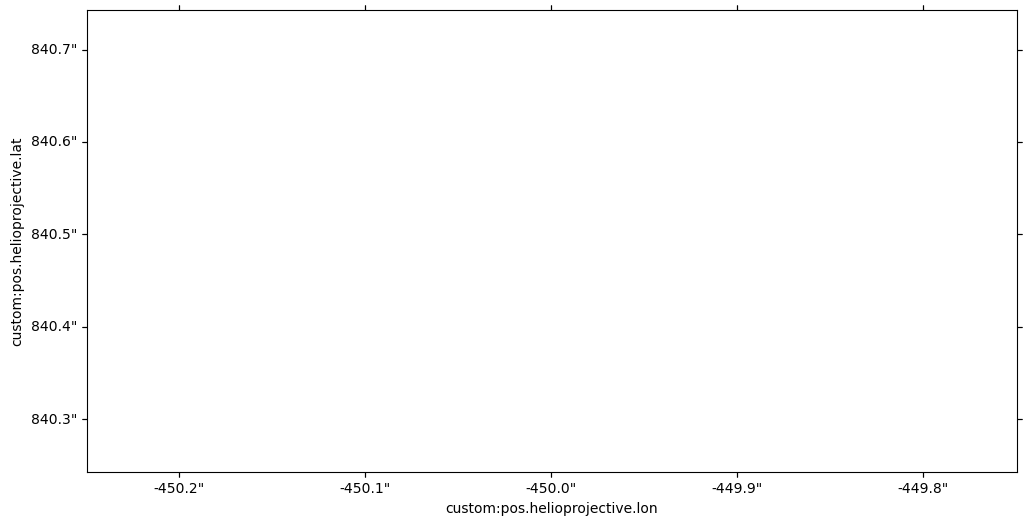

In [18]:

for hour in range(1,24):
    hh="%.2d" % hour
    NAvgMap = sunpy.map.Map('/efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T'+ hh+ ':22:33.300.fits')
    NAvgMap
    top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=NAvgMap.coordinate_frame)
    bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=NAvgMap.coordinate_frame)
    #Create the submap North
    submapS = NAvgMap.submap(bottom_leftS, top_right=top_rightS)
    fig = plt.figure(figsize = (12,6)) #make the figure bigger
    ax = fig.add_subplot(projection=submapS)
    #ax1.plot_coord(line70, color="w")
    submapS.plot(axes = ax, interpolation = 'none', cmap='bwr') #RdBu)
    ax.grid(False)

In [31]:
for hour in range(1, 24):
    hh = "%.2d" % hour
    fits_path = '/efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T' + hh + ':22:33.300.fits'
    print(fits_path)
    NAvgMap = sunpy.map.Map(fits_path)
    NAvgMap
    top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=NAvgMap.coordinate_frame)
    bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=NAvgMap.coordinate_frame)

    # Create the submap North
    submapS = NAvgMap.submap(bottom_leftS, top_right=top_rightS)

    fig = plt.figure(figsize=(12, 6))  # make the figure bigger
    ax = fig.add_subplot(projection=submapS)
    submapS.plot(axes=ax, interpolation='none', cmap='bwr')
    ax.grid(False)

    ax.set_title(f'Northern Polar Region - 2010-05-01T{hh}:22:33.300')
        
    # Save the figure
    output_file = f'/efs/okome7/movie_images/frame_2010_05_01T{hh}_hour.png'
    # plt.savefig(output_file, bbox_inches='tight')
    plt.close()
        
    # print(f'Saved {output_file}')
    
    #except FileNotFoundError:
      #  print(f'File not found for 2010-05-01T{hh}:22:33.300.fits. Skipping...')
      #  continue  # Proceed to the next hour if file is not found
    
   # except Exception as e:
     #   print(f'Error processing {fits_path}: {e}')


/efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T01:22:33.300.fits


See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


/efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T02:22:33.300.fits


See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


/efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T03:22:33.300.fits


See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


/efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T04:22:33.300.fits


See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


/efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T05:22:33.300.fits


See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


/efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T06:22:33.300.fits


ValueError: Did not find any files at /efs/jrclark/Saved FITS/Northern PFe Masks/2010_05/PFe_North_Mask_2010-05-01T06:22:33.300.fits

In [ ]:
NScaled = (NAvgMap**15)*100

top_rightN = SkyCoord(350 * u.arcsec, 960 * u.arcsec, frame=NAvgMap.coordinate_frame)
bottom_leftN = SkyCoord(-350 * u.arcsec, 840 * u.arcsec, frame=NAvgMap.coordinate_frame)
NSsubmap = NScaled.submap(bottom_leftN, top_right=top_rightN)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(projection=NSsubmap)
NSsubmap.plot(axes = ax, interpolation = 'none',cmap = 'RdBu')

#No axis no title no nothing
#ax.set_axis_off()
ax.grid(False)
plt.title('')

In [ ]:
#Make movie frames
YM = '2014_03'

folder = '/efs/jrclark/PFe Sonified/Catalogs/' + YM + '/'
filenames = []
for x in os.listdir(folder):
    if x[0]!= '.':
        filenames.append(x[12:-6])
filenames.sort()

In [ ]:
file_Names='/efs/jrclark/Saved FITS/Northern PFe Masks/2022_09/PFe_North_Mask_2022-09-01T01:22:33.300.fits'
fobj10 = s3c.get_object(Bucket=mybucket,Key= file_Names)
rawdata10 = fobj10['Body'].read()
bdata10 = io.BytesIO(rawdata10)
hdul10 = astropy.io.fits.open(bdata10,memmap=False)
header10=hdul10[1].header
header10

In [ ]:
days_in_twowks = [f'{i:02}' for i in range(1, 8)]
#efs/jrclark/Saved FITS/Northern PFe Masks
#efs/jrclark/Saved FITS/Northern PFe Masks/2010_06
#efs/jrclark/Saved FITS/Northern PFe Masks/2010_06/PFe_North_Mask_2010-06-01T01:22:33.300.fits
for days in days_in_twowks:
    for hour in range(24):
        hh="%.2d" % hour
        file_Names='efs/jrclark/Saved FITS/Northern PFe Masks/2010_06/PFe_North_Mask_2010-06-' + days + 'T' + hh+ ':22:33.300.fits'

        print(file_Names)
        
        #fobj10 = s3c.get_object(Bucket=mybucket,Key= file_Names)
        #rawdata10 = fobj10['Body'].read()
        #bdata10 = io.BytesIO(rawdata10)
        #hdul10 = astropy.io.fits.open(bdata10,memmap=False)
        #header10=hdul10[1].header
        #header10
        #with hdul10:
           # header10 = hdul10[1].header
            #ICMap10 = sunpy.map.Map(hdul10[1].data, header10)
        
        #top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap10.coordinate_frame)
        #bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=ICMap10.coordinate_frame)
        
        #Create the submap North
        #submapS = ICMap10.submap(bottom_leftS, top_right=top_rightS)
        #fig10 = plt.figure(figsize = (12,6), layout="constrained") #make the figure bigger
        #ax = fig.add_subplot(projection=submapS)
        #submapS.plot(axes = ax, interpolation = 'none', cmap='hot')
        
        
        #plt.savefig('/efs/okome7/movie_images/frame_'+ var+ '.png', bbox_inches = 'tight')
        #plt.close(fig10)
        
#header10
#efs/jrclark/Saved FITS/Northern PFe Masks/2022_09/PFe_North_Mask_2022-09-15T02:22:33.300.fits

#ICMap10 = sunpy.map.Map(hdul10[1].data, hdul10[1].header)

#top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap10.coordinate_frame)
#bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=ICMap10.coordinate_frame)

#Create the submap North
#submapS = ICMap10.submap(bottom_leftS, top_right=top_rightS)

#fig10 = plt.figure(figsize = (12,6), layout="constrained") #make the figure bigger
#ax = fig.add_subplot(projection=submapS)
#submapS.plot(axes = ax, interpolation = 'none', cmap='hot')

#fig10 = plt.figure(figsize = (8,6),layout="constrained")

#plt.plot( label='idk')
#plt.xlabel("Time since (hours)")
#plt.ylabel("idk")
#plt.title("idks")
#plt.grid()
    
#plt.legend(title='Ridky')
#plt.show()

In [ ]:
NAvgMap=sunpy.map.Map('/efs/jrclark/Saved FITS/Northern PFe Masks/2022_09/PFe_North_Mask_2022-09-01T00:22:33.300.fits')
NAvgMap

#this should be inside for loop
#1 get list of filenames, make a for loop to iterate through filenames, create a sunpy map, set vmin and vmax to some value


In [ ]:
header_ex6=hdul8[1].header
header_ex6

In [ ]:
#efs/okome7/movie_images
#var can be something like 0 to 100 or dates so that it can save the files separately
plt.savefig('/efs/okome7/movie_images/frame_'+ var+ '.png', bbox_inches = 'tight'))

In [ ]:
NAvgMap=sunpy.map.Map('/efs/jrclark/Saved FITS/Northern PFe Masks/2022_09/PFe_North_Mask_2022-09-01T01:22:33.300.fits')
NAvgMap


In [ ]:
fobj8= s3c.get_object(Bucket=mybucket,Key= '/efs/jrclark/Saved FITS/Northern PFe Masks/2022_09/PFe_North_Mask_2022-0901T01:22:33.300.fits')

#scaleddata=pow(data,15)*100
rawdata8 = fobj8['Body'].read()
bdata8 = io.BytesIO(rawdata8) 
hdul8 = astropy.io.fits.open(bdata8,memmap=False)

ICMap8 = sunpy.map.Map(hdul8[1].data, hdul8[1].header)


#plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection=ICMap8)
ICMap8.plot(axes = ax, interpolation = 'none')

top_rightS = SkyCoord(450 * u.arcsec, 840 * u.arcsec, frame=ICMap8.coordinate_frame)
bottom_leftS = SkyCoord(-450 * u.arcsec, 970 * u.arcsec, frame=ICMap8.coordinate_frame)

#Create the submap North
submapS = ICMap8.submap(bottom_leftS, top_right=top_rightS)

fig = plt.figure(figsize = (12,6)) #make the figure bigger
ax = fig.add_subplot(projection=submapS)
submapS.plot(axes = ax, interpolation = 'none', cmap='hot')

In [ ]:
#part 3
#efs/jrclark/Saved FITS/Northern PFe Masks/2010_09/PFe_North_Mask_2010-09-01T00:22:33.300.fits
#does not need to be converted to bytes/rawdata
NAvgMap = sunpy.map.Map('/efs/jrclark/Saved FITS/Northern PFe Masks/2010_09/PFe_North_Mask_2010-09-01T00:22:33.30.fits')
NAvgMap
#user a for loop to iterate through each of the fits files #radial vector data 4
#
